In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.constants as sc 
import pandas as pd
import seaborn as sns
from scipy.integrate import quad
from scipy.interpolate import interp1d, barycentric_interpolate

from astropy.cosmology import WMAP9 as cosmo

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24

import CII_foregrounds
from CCAT_p import CCAT_p
%load_ext autoreload
%autoreload 2

In [4]:
freq_bins = np.arange(185,310,0.4) 
omega_pix_sr_yunting = (25.8**2)/(4.25*10**(10)) # this is the pixel size in steradians 

omega_pix_sr_yunting

1.5662117647058824e-08

In [5]:
cii_fg = CII_foregrounds.CII_fg(274,275.5,omega_pix_sr_yunting,2500)

In [4]:
cii_fg.find_lines_in_bin()

# data[h,0] = line name
			# data[h,1] = zmid
			# data[h,2] = delta z
			# data[h,3] = alpha @ zmid
			# data[h,4] = log(L*) @ zmid
			# data[h,5] = log(phi) @ mid


In [6]:

cii_fg.compute_fg()



array([[1.64269024e-13, 1.14275897e-14, 6.80663305e-13, ...,
        1.03785682e-14, 1.26283452e-14, 7.22640339e-15],
       [4.95592211e-13, 3.06211475e-14, 1.33940250e-12, ...,
        7.21706653e-12, 1.91332694e-12, 1.71001770e-12],
       [1.24970775e-11, 1.91830591e-12, 1.27051236e-12, ...,
        1.02418646e-12, 8.84375008e-12, 4.45788051e-12],
       [8.84378374e-12, 1.13289351e-11, 1.01343473e-11, ...,
        7.17631848e-12, 1.06936905e-11, 2.89564625e-12]])

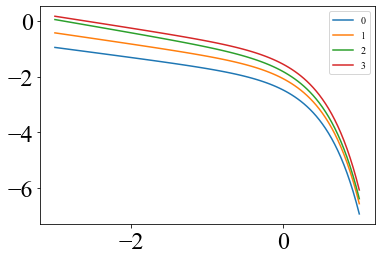

In [7]:
for i in range(4):
    plt.plot(cii_fg.log_ll_star,np.log10(cii_fg.ave_Ns[i]),label = i)
plt.legend()

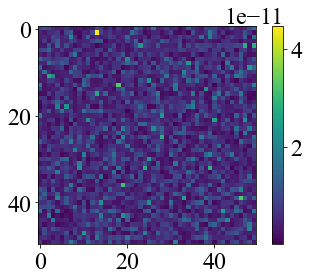

In [8]:
plt.imshow(np.reshape(cii_fg.L_tot[3],(50,50)))
plt.colorbar(label = "")

In [9]:
cii_fg.intensity()

1.8205127737125e-22
[[0.24162433 0.0024935  0.00133293 ... 0.13926472 0.0136285  0.00469493]
 [0.08802224 0.01520468 0.08541945 ... 0.03507098 0.0083494  0.03115523]
 [0.00262412 0.0146589  0.01864732 ... 0.02594988 0.0081213  0.01240884]
 [0.016876   0.0061987  0.02159402 ... 0.00327052 0.0182638  0.00973481]]


NameError: name 'divider' is not defined

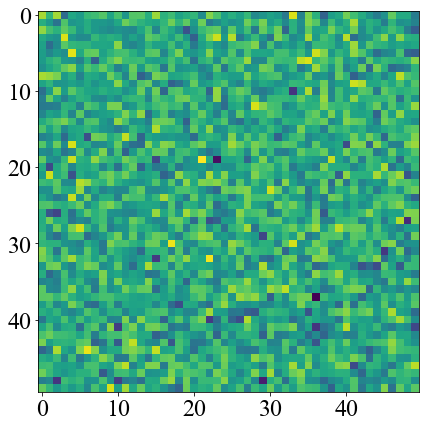

In [10]:
fig, ax = plt.subplots(1,1, figsize = (7,7))
img1 = ax.imshow(np.reshape(np.log10(cii_fg.I[1]),(50,50)))
cax2 = divider.append_axes("right", size="7%", pad=0.1)
cbar = fig.colorbar(img1)#, cax = cax2)
cbar.set_label("log$_{10}$(I[Jy/sr])", fontsize = 24)
divider = make_axes_locatable(ax)
fig.suptitle('Line Interlopers at 274 GHz',fontsize=24)




Text(0.5, 0.98, 'Line Interlopers at 274 GHz')

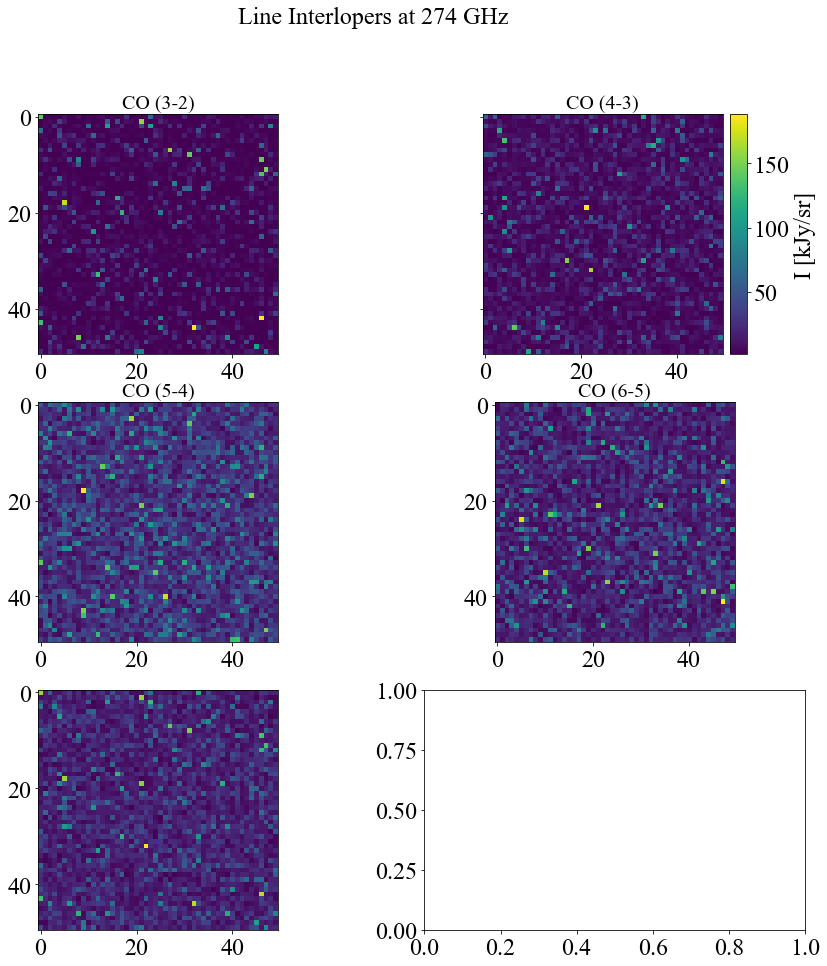

In [11]:
#try plotting log

fig, ax = plt.subplots(3,2, figsize = (15,15))
img1 = ax[0][0].imshow(np.reshape(cii_fg.I[0]/1000,(50,50)))
img2 = ax[0][1].imshow(np.reshape(cii_fg.I[1]/1000,(50,50)))
img3 = ax[1][1].imshow(np.reshape(cii_fg.I[2]/1000,(50,50)))
img4 = ax[1][0].imshow(np.reshape(cii_fg.I[3]/1000,(50,50)))
img5 = ax[2][0].imshow(np.reshape(np.sum(cii_fg.I/1000,axis = 0), (50,50)))

divider = make_axes_locatable(ax[0][1])
cax2 = divider.append_axes("right", size="7%", pad=0.1)
cbar = fig.colorbar(img3, cax=cax2)
cbar.set_label('I [kJy/sr]', fontsize = 24)
ax[0][0].set_title('CO (3-2)', fontsize = 20)
ax[0][1].set_title('CO (4-3)', fontsize = 20)
ax[1][0].set_title('CO (5-4)', fontsize = 20)
ax[1][1].set_title('CO (6-5)', fontsize = 20)
ax[0][1].get_yaxis().set_ticklabels([])

ax[0][1].get_yaxis().set_ticklabels([])
fig.suptitle('Line Interlopers at 274 GHz',fontsize=24)






1.7376054758452735


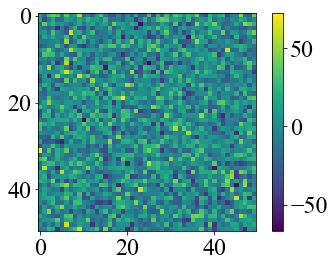

In [178]:
RA = np.linspace(1,1.015,50)
DEC = np.linspace(1,1.015,50)



noisy_convolve = CCAT_p(np.reshape(cii_fg.I[0],(50,50)),RA,DEC,274,0.001,True, 2.5e6, 3*(60*60), 0.75) 

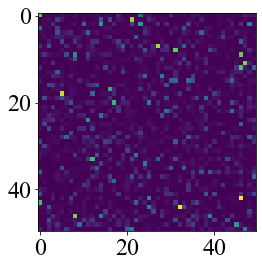

In [179]:
plt.imshow(noisy_convolve)

In [177]:
2*np.pi*((0.01/(2*np.sqrt(2*np.log(2))) )**2)

0.00011330900354567986

In [135]:
(3/4000)*16

0.012

In [ ]:
np.ln()